# What is Sequential model

### Sequential Model in Deep Learning

In deep learning, the **Sequential model** is a type of model provided by Keras (a high-level API for building neural networks) that allows you to build a linear stack of layers. It's called "sequential" because the layers are arranged in sequence—one after the other, forming a chain.

### Key Characteristics of the Sequential Model:

#### Layer-by-Layer Construction:
- Each layer has one input and one output.
- The output of one layer is the input to the next layer in the sequence.

#### Simple and Straightforward:
- The model is very simple to use when the architecture of your network is a straight stack of layers (e.g., fully connected layers, convolutional layers, etc.).
- It’s not suitable for models that require multiple inputs, outputs, or complex layer connections (in that case, use the functional API or subclassing).

#### Use Cases:
- Best suited for simple models where layers are added one by one without the need for branching, skipping, or combining layers (e.g., simple CNNs, feedforward neural networks, and basic RNNs).

### Example of a Sequential Model:

Here is a basic example of how to define and compile a `Sequential` model in Keras:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

### Define a sequential model
model = Sequential()

### Add layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # Flatten the feature maps into a 1D vector
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dense(10, activation='softmax'))  # Output layer for classification (10 classes)

### Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Print a summary of the model
model.summary()

### Explanation of the Example:

- **Conv2D Layer**: Adds a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation function. The `input_shape` is specified for the first layer (28x28 pixels, grayscale).
  
- **MaxPooling2D Layer**: Adds a pooling layer to downsample the spatial dimensions.
  
- **Flatten Layer**: Converts the 2D feature maps into a 1D vector to prepare for fully connected layers.
  
- **Dense Layer**: Adds a fully connected layer with 128 units and ReLU activation.
  
- **Output Dense Layer**: Adds the final layer with 10 units (for 10 classes) and the softmax activation function for multi-class classification.

### Summary:
- The **Sequential model** is perfect when you need a simple, layer-by-layer structure.
- It's easy to use but has limitations when more complex network architectures are required.
- If you need to implement more advanced architectures, like networks with multiple inputs/outputs or models that involve shared layers or residual connections, you should consider using the **Keras functional API** instead.

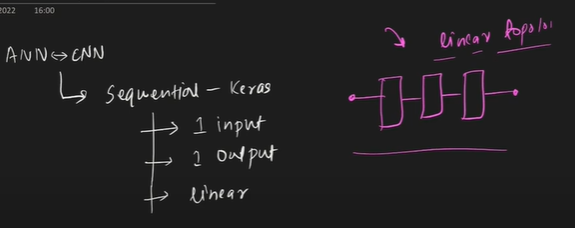

## Problem with Sequencial model
## Example 1
```python
Suppose we have a dataset of images & In which having human faces & we need ti create a model which can pridect age,Emotions(Happy,sad,Angery).
```

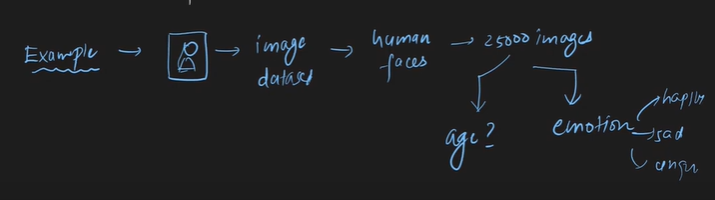

```python 
So type of problem can't be solved by 
Sequential models
```

### Solution for that model

**Sol 1:**- 
Create two different models which will give tw different output
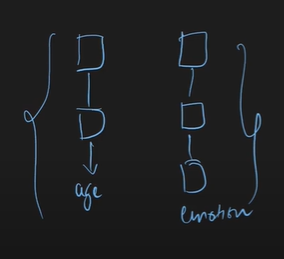

**Sol 2:**- Use Fucntional model instead of Sequential API Approach
```python
Load dataset & define model & then create two different layers & then merge the output of models
```
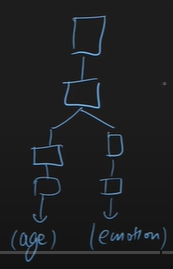

## Example 2

### E-commerce Problem: Predicting Product Prices

The image represents an e-commerce problem where the goal is to predict product prices using multiple types of data:

- **Product Meta Data (Tabular)**: Structured tabular data such as product categories, dimensions, etc.
- **Product Description (Text)**: Unstructured textual data such as product descriptions.
- **Product Image**: Visual data in the form of product images.

This problem involves combining three different types of data (tabular, text, and image data) to predict a target variable, which is the product price.
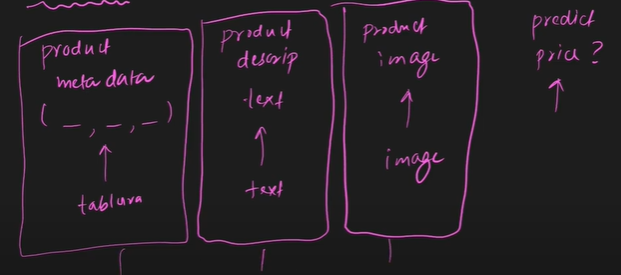


### Why This Can't Be Solved by a Sequential Model:

The **Sequential model** in Keras is not suitable here because:

- **Multiple Inputs**: The problem involves different input modalities (tabular, text, and image), which cannot be easily handled in a single sequential flow of layers.
- **Different Preprocessing Pipelines**: Each type of data requires its own unique preprocessing pipeline (e.g., convolutional layers for images, embedding or recurrent layers for text, and dense layers for tabular data).
- **Merging Information**: A Sequential model does not support merging multiple branches of information before making a prediction.

### Suitable Approach:

Use the **Keras Functional API** or **Model Subclassing** to handle this problem:

- For **images**, you might use CNN layers.
- For **text**, you might use embedding layers followed by RNNs or transformers.
- For **tabular data**, you would typically use dense layers.
- Finally, you can merge the outputs of these different branches and connect them to fully connected layers to make a prediction.
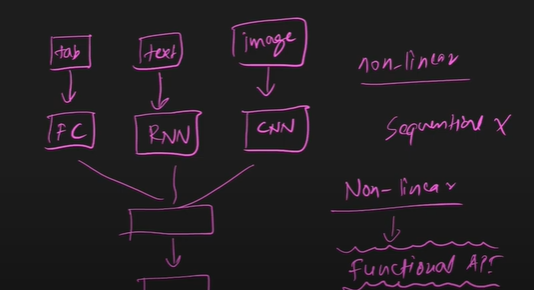
This kind of architecture is required when the model must handle complex, multi-modal inputs, making it more advanced than what a simple Sequential model can manage.

# ---------------------- Functional API ----------------

### Functional API in Keras

The **Functional API** in Keras is an advanced interface for building more complex models than what the **Sequential API** can handle. While the Sequential API is straightforward and easy to use for simple, linear stacks of layers, the Functional API allows you to build models that involve more complicated architectures, including:

- Models with **multiple inputs** and/or **multiple outputs**
- Models where layers connect in **non-linear ways** (e.g., branching or merging of layers)
- Models that share layers or have layers with **shared weights**
- Models where you want to use **residual connections** (like in ResNet)

### Key Concepts of the Functional API:

1. **Layer as a Function**:
   In the Functional API, layers are treated like functions. You call a layer on a tensor (input) and it returns another tensor (output), which allows for more flexible layer connections.

2. **Defining Inputs**:
   You first define the shape of the input to your model. This is done using the `Input()` function. You can specify the shape for each input (if you have multiple inputs).

3. **Creating the Model**:
   Once you define the architecture of your network by chaining the layers together, you can create the model by specifying the inputs and outputs.

### Example of a Functional API Model:

Here’s an example of building a model with multiple inputs using the Functional API:

```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

#### Define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

#### The first branch operates on the first input
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

#### The second branch operates on the second input
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

#### Combine the outputs of the two branches
combined = Concatenate()([x.output, y.output])

#### Apply a Dense layer to the combined output
z = Dense(64, activation="relu")(combined)
z = Dense(1, activation="linear")(z)

#### Define the final model with two inputs and one output
model = Model(inputs=[x.input, y.input], outputs=z)

#### Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

#### Print model summary
model.summary()
```